# Problem Set 2

Many of the concepts needed to complete this homework are introduced in the recitation notebooks and the python tutorials. 

In [ ]:
# Import the packages and libraries you will use here
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns
from matplotlib import pyplot as plt

from google.colab import drive
drive.mount('/content/gdrive/')
%cd '/content/gdrive/My Drive/Econ484/'

Mounted at /content/gdrive/
/content/gdrive/My Drive/Econ484


### 1
This exercise relates to the College data set, which can be found in the file College.csv. It contains a number of variables for 777 different universities and colleges in the US. The variables are  
* Private : Public/private indicator  
* Apps : Number of applications received  
* Accept : Number of applicants accepted  
* Enroll : Number of new students enrolled  
* Top10perc : New students from top 10 % of high school class  
* Top25perc : New students from top 25 % of high school class  
* F.Undergrad : Number of full-time undergraduates
* P.Undergrad : Number of part-time undergraduates  
* Outstate : Out-of-state tuition  
* Room.Board : Room and board costs  
* Books : Estimated book costs  
* Personal : Estimated personal spending  
* PhD : Percent of faculty with Ph.D.’s  
* Terminal : Percent of faculty with terminal degree  
* S.F.Ratio : Student/faculty ratio  
* perc.alumni : Percent of alumni who donate  
* Expend : Instructional expenditure per student  
* Grad.Rate : Graduation rate  
Before reading the data into python, it can be viewed in Excel or a text editor is well.

### (a)
Use the pandas read_csv() function to read the data into python. Call the loaded data df. Make sure that you have the directory set to the correct location for the data or use the absolute filepath so the program knows where to look for the file. Use `head` and `tail` to show the first 10 and last 10 observations of the data, the default is five so you will need to add an argument for the number of rows. 

In [ ]:
college = pd.read_csv('College.csv')
college.head(10)

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
5,Albertson College,Yes,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55
6,Albertus Magnus College,Yes,353,340,103,17,45,416,230,13290,5720,500,1500,90,93,11.5,26,8861,63
7,Albion College,Yes,1899,1720,489,37,68,1594,32,13868,4826,450,850,89,100,13.7,37,11487,73
8,Albright College,Yes,1038,839,227,30,63,973,306,15595,4400,300,500,79,84,11.3,23,11644,80
9,Alderson-Broaddus College,Yes,582,498,172,21,44,799,78,10468,3380,660,1800,40,41,11.5,15,8991,52


In [ ]:
college.tail(10)

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
767,Winthrop University,No,2320,1805,769,24,61,3395,670,6400,3392,580,2150,71,80,12.8,26,6729,59
768,Wisconsin Lutheran College,Yes,152,128,75,17,41,282,22,9100,3700,500,1400,48,48,8.5,26,8960,50
769,Wittenberg University,Yes,1979,1739,575,42,68,1980,144,15948,4404,400,800,82,95,12.8,29,10414,78
770,Wofford College,Yes,1501,935,273,51,83,1059,34,12680,4150,605,1440,91,92,15.3,42,7875,75
771,Worcester Polytechnic Institute,Yes,2768,2314,682,49,86,2802,86,15884,5370,530,730,92,94,15.2,34,10774,82
772,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99
776,York College of Pennsylvania,Yes,2989,1855,691,28,63,2988,1726,4990,3560,500,1250,75,75,18.1,28,4509,99


### (b)
Read in the data again this time calling the data college and using the parameter index_col=0 in the read_csv function. Notice the difference between the index used when the dataframe is displayed. 

In [ ]:
college = pd.read_csv('College.csv', index_col=0)
college.head(10)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
Albertson College,Yes,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55
Albertus Magnus College,Yes,353,340,103,17,45,416,230,13290,5720,500,1500,90,93,11.5,26,8861,63
Albion College,Yes,1899,1720,489,37,68,1594,32,13868,4826,450,850,89,100,13.7,37,11487,73
Albright College,Yes,1038,839,227,30,63,973,306,15595,4400,300,500,79,84,11.3,23,11644,80
Alderson-Broaddus College,Yes,582,498,172,21,44,799,78,10468,3380,660,1800,40,41,11.5,15,8991,52


### (c)
Now we will do some prelimainary analysis and visualizations of the data that was loaded  
$\mathbf{i)}$ Use the describe method of the dataframe object that you made by reading in the data to show the summary statistics of each of the columns

In [ ]:
college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


$\mathbf{ii)}$ Use the scatter_matrix function that was imported from pandas to produce scatter plots of the pairwise combinations of 6 of the variables of your choice. Adjust the figsize argument make the displayed plots more readable and understandable.

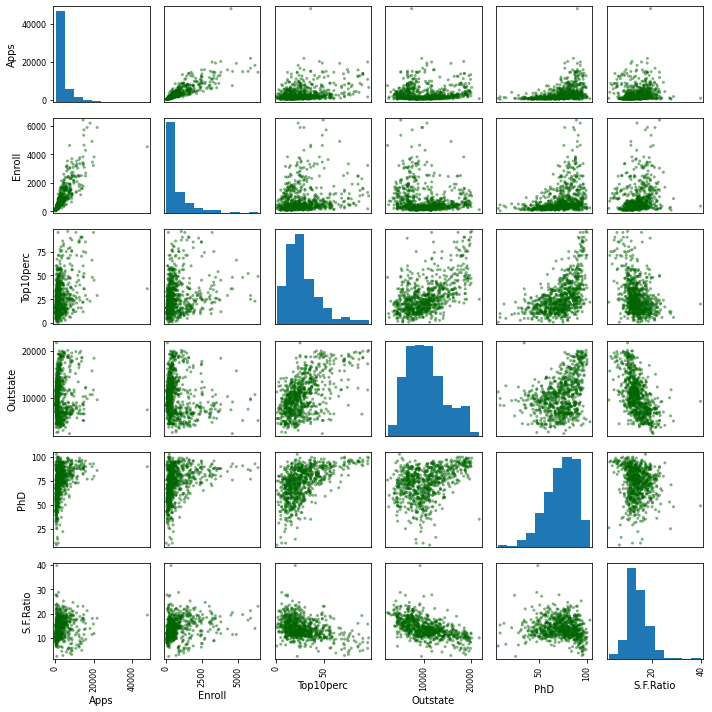

In [ ]:
scatter_matrix(college[['Apps', 'Enroll', 'Top10perc', 'Outstate', 'PhD', 'S.F.Ratio']], figsize=(10, 10), color='darkgreen')
# call the function above these lines
plt.tight_layout() # this makes the output a little neater when you display plots
plt.show() # this will force the plots to show, they only show without this if they are the output of the last line in a cell

$\mathbf{iii)}$ Use seaborn's or matplotlib's boxplot function to create a boxplot of Outstate on private.  
Hint: You can either pass in the columns as objects or the names of the columns and use data=college as a parameter

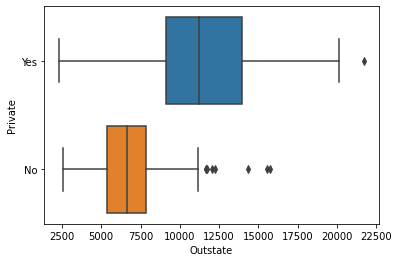

In [ ]:
sns.boxplot(x=college['Outstate'], y=college['Private'])

$\mathbf{iv)}$  Create a new qualitative variable in the dataframe, called Elite, by binning the Top10perc variable. We are going to divide universities into two groups based on whether or not the number of students coming from the top 10% of their high school classes exceeds 50.

In [ ]:
college['Elite'] = (college['Top10perc'] > 50).replace({True:'Yes', False:'No'})

Get a count of how many universities are in the 'Elite' category. Now make boxplot of Outstate on Elite.

Number of elite colleges:  78


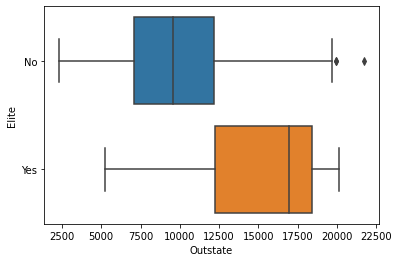

In [ ]:
print('Number of elite colleges: ', (college['Elite']=='Yes').sum())
sns.boxplot(x=college['Outstate'], y=college['Elite']);

$\mathbf{v)}$ Use seaborn's distplot function to produce some histograms with differing numbers of bins for a quantitative variable of your choice. You can make multiple cells or if you are familiar with python try making a grid of multiple plots to be displayed by one cell.

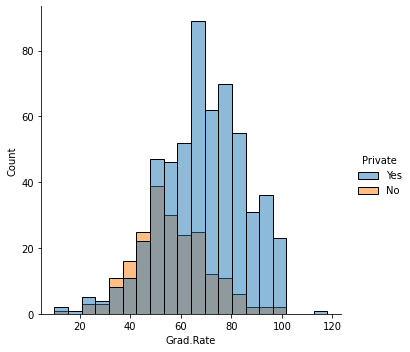

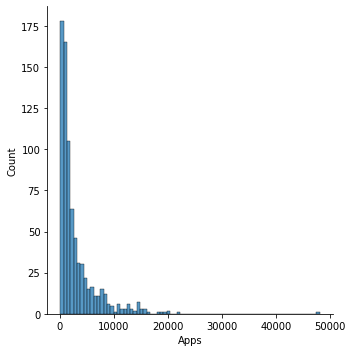

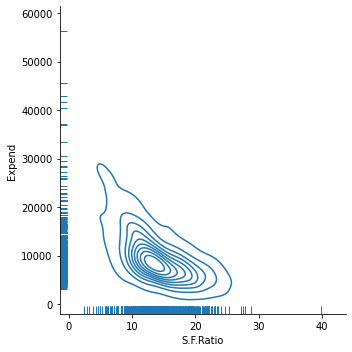

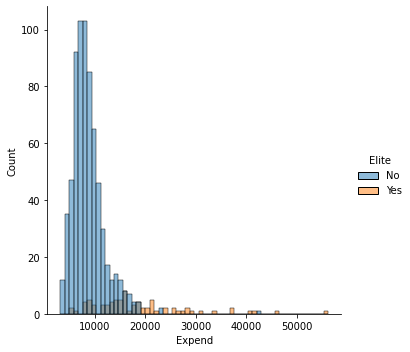

In [ ]:
sns.displot(x=college['Grad.Rate'], hue=college['Private'])
sns.displot(x=college['Apps'])
sns.displot(x=college['S.F.Ratio'], y=college['Expend'], kind='kde', rug=True)
sns.displot(x=college['Expend'], hue=college['Elite'])

You can create a grid of histograms with the hist method of the dataframe. Choose some variables that seem interesting and create histograms in this way.

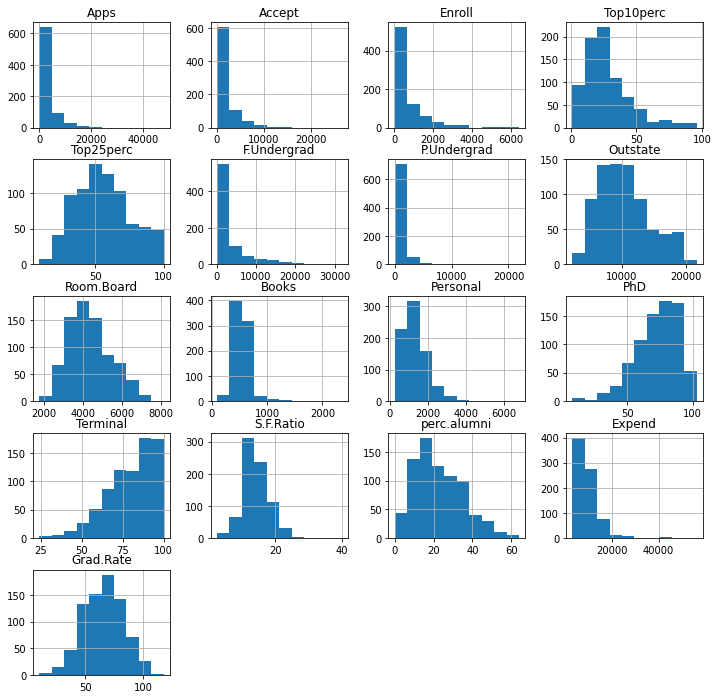

In [ ]:
college.hist(figsize=(12,12));

Using the tools that were introduced and/or other ones you find, continue exploring the data set and write a brief summary of what you find. This should involve something you do that was not a part of the previous responses.  
We are not looking for anything in particular just try to make something that shows something about the data ond its relationships in graphs or summary statistics that you haven't already created above.

In [ ]:
college[['Private', 'Elite']] = college[['Private', 'Elite']].replace({'Yes':1, 'No':0}) # converting Yes/No to 1/0 to compute corr

# for each variable, find the 3 other variables with highest correlation
for col in college.corr().columns:
  print('\n', col.upper())
  print(college.corr()[col].sort_values(ascending=False).iloc[1:4])


 PRIVATE
Outstate       0.552650
perc.alumni    0.414775
Room.Board     0.340532
Name: Private, dtype: float64

 APPS
Accept         0.943451
Enroll         0.846822
F.Undergrad    0.814491
Name: Apps, dtype: float64

 ACCEPT
Apps           0.943451
Enroll         0.911637
F.Undergrad    0.874223
Name: Accept, dtype: float64

 ENROLL
F.Undergrad    0.964640
Accept         0.911637
Apps           0.846822
Name: Enroll, dtype: float64

 TOP10PERC
Top25perc    0.891995
Elite        0.759027
Expend       0.660913
Name: Top10perc, dtype: float64

 TOP25PERC
Top10perc    0.891995
Elite        0.595890
PhD          0.545862
Name: Top25perc, dtype: float64

 F.UNDERGRAD
Enroll    0.964640
Accept    0.874223
Apps      0.814491
Name: F.Undergrad, dtype: float64

 P.UNDERGRAD
F.Undergrad    0.570512
Enroll         0.513069
Accept         0.441271
Name: P.Undergrad, dtype: float64

 OUTSTATE
Expend        0.672779
Room.Board    0.654256
Grad.Rate     0.571290
Name: Outstate, dtype: float64

 ROOM

I found the three most (positively) correlated features with each feature. I recoded qualitative yet polar features to ones and zeros so they would be included in the calculations. Many of the results are as expected, which corroborates intuition, and I found that these results collectively paint a pretty comprehensive picture of college characteristics. 

## Chapter 3
$\mathbf{a)}$Load in auto.csv as a dataframe and the produce a grid of the pairwise scatterplots of the variables of the dataframe

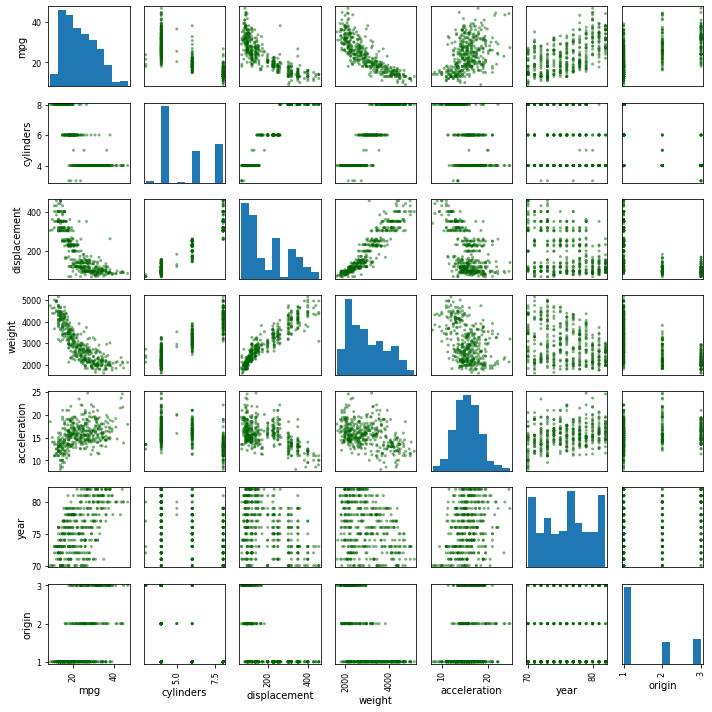

In [ ]:
auto = pd.read_csv('Auto.csv')
scatter_matrix(auto, figsize=(10, 10), color='darkgreen')
# call the function above these lines
plt.tight_layout() # this makes the output a little neater when you display plots
plt.show() # this will force the plots to show, they only show without this if they are the output of the last line in a cell

$\mathbf{b)}$ Show the correlation matrix. There are several ways to do this but you should be able to find a function that makes it for the numeric variables of a dataframe.

In [ ]:
auto.corr()

,mpg,cylinders,displacement,weight,acceleration,year,origin
mpg,1.000000,-0.776260,-0.804443,-0.831739,0.422297,0.581469,0.563698
cylinders,-0.776260,1.000000,0.950920,0.897017,-0.504061,-0.346717,-0.564972
displacement,-0.804443,0.950920,1.000000,0.933104,-0.544162,-0.369804,-0.610664
weight,-0.831739,0.897017,0.933104,1.000000,-0.419502,-0.307900,-0.581265
acceleration,0.422297,-0.504061,-0.544162,-0.419502,1.000000,0.282901,0.210084
year,0.581469,-0.346717,-0.369804,-0.307900,0.282901,1.000000,0.184314
origin,0.563698,-0.564972,-0.610664,-0.581265,0.210084,0.184314,1.000000


$\mathbf{c)}$ Use the statsmodel OLS function to perform a linear regression with mpg as the response and year as a feature (a variable in the regression). Use the summary() method to print the results. 

In [ ]:
from statsmodels.regression import linear_model

# fill in the variable names you plan on using in the regression
X = auto.loc[:,'year']
y = auto['mpg']
reg_obj = linear_model.OLS(y,X)
results = reg_obj.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                    mpg   R-squared (uncentered):                   0.915
Model:                            OLS   Adj. R-squared (uncentered):              0.915
Method:                 Least Squares   F-statistic:                              4281.
Date:                Fri, 28 Jan 2022   Prob (F-statistic):                   2.07e-214
Time:                        03:08:03   Log-Likelihood:                         -1347.6
No. Observations:                 397   AIC:                                      2697.
Df Residuals:                     396   BIC:                                      2701.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Do a linear regression with mpg as the outcome and all other variables except name as the predictors. Comment on the output. For instance:  
i. Is there a relationship between the predictors and the response?
> Yes; the R-squared is 0.981, indicating strong explanatory power.

ii. Which predictors appear to have a statistically significant relationship to the response?  
> Most notably Acceleration, as well as Cylinders and Displacement. This tracks as high values in these three features are characteristic of vehicles that prioritize speed over effeciency.

iii. What does the coefficient for the year variable suggest?
> That MPG has trended upward over time at a rate of about .5 MPG per year, ceterus paribus.

In [ ]:
from statsmodels.regression import linear_model
import numpy as np

# fill in the variable names you plan on using in the regression
X = auto.loc[:,['cylinders', 'displacement', 'weight', 'acceleration', 'year', 'origin']]
y = auto['mpg']
results = linear_model.OLS(y,X).fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                    mpg   R-squared (uncentered):                   0.981
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                              3393.
Date:                Fri, 28 Jan 2022   Prob (F-statistic):                        0.00
Time:                        03:08:03   Log-Likelihood:                         -1049.3
No. Observations:                 397   AIC:                                      2111.
Df Residuals:                     391   BIC:                                      2135.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

$\mathbf{d)}$ Use statsmodels' inluence_plot() function to produce diagnostic plots of the linear regression fit. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?

> Yes, the residual plots suggest unusual outliers around the 0.0028 mark. Around this leverage value is also where residuals seem to go from weakly bottom heavy to strongly top heavy. 

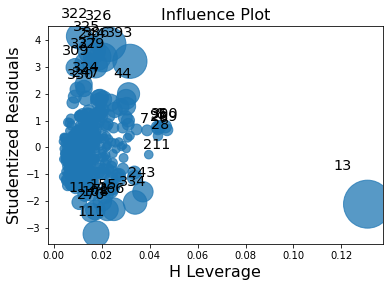

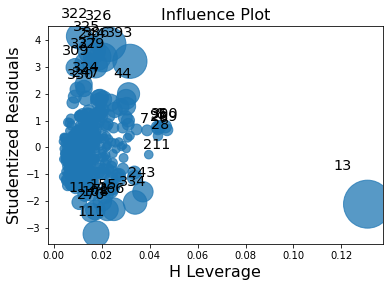

In [ ]:
from statsmodels.graphics.regressionplots import influence_plot

influence_plot(results)

$\mathbf{e)}$ Create some polynomial and interaction features from the existing set of variables and fit linear regression models with them. Do any interaction terms appear to be statistically significant? What about polynomial terms?  
A relativley easy way to do this is the use scikit-learn's polynomial features but you can add in interaction and squared columns individually to the dataframe by multiplying columns together.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2).fit_transform(X)
results = linear_model.OLS(y,poly).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     110.4
Date:                Fri, 28 Jan 2022   Prob (F-statistic):          7.85e-159
Time:                        03:08:04   Log-Likelihood:                -941.72
No. Observations:                 397   AIC:                             1939.
Df Residuals:                     369   BIC:                             2051.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        367.1044     86.809      4.229      0.0

## PCA
In the first cell I have some code which will generate some random data with 500 features and 10000 observations. There will be 3 clusters of groups indicated by the y variable. Use PCA to reduce the dimensionality down to 2 principle components. Sklearn has a PCA and TruncatedSVD object you can use, the difference will just be demeaning the values or not so there shouldn't be a big difference in results from either method.

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA

SEED = 123
X, y = make_blobs(n_samples=1000, n_features=5000, cluster_std=90., random_state=SEED)

Generate a plot of the 2 principal components that were found. You may find it helpful to combine X and y into a pandas DataFrame object so that it plays more nicely with seaborn.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaled = StandardScaler()
scaled.fit(X)
X_scaled = scaled.transform(X)

pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

results = linear_model.OLS(y,X_pca).fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.299
Model:                            OLS   Adj. R-squared (uncentered):              0.298
Method:                 Least Squares   F-statistic:                              213.1
Date:                Fri, 28 Jan 2022   Prob (F-statistic):                    8.73e-78
Time:                        03:11:39   Log-Likelihood:                         -1496.1
No. Observations:                1000   AIC:                                      2996.
Df Residuals:                     998   BIC:                                      3006.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## KMeans

Perform K-means clustering of the observations with K = 3. How well do the clusters that you obtained in K-means clustering compare to the true class labels? You can use the classification report function from skelarn to get some metrics that measure the quality of the model you used.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report

assignments = KMeans(n_clusters=3).fit(X).labels_
print(classification_report(y_true=y, y_pred=assignments))

              precision    recall  f1-score   support

           0       0.42      0.59      0.49       334
           1       0.40      0.39      0.40       333
           2       0.33      0.21      0.25       333

    accuracy                           0.40      1000
   macro avg       0.39      0.40      0.38      1000
weighted avg       0.39      0.40      0.38      1000



Perform K-means clustering with K = 2. Describe your results.

In [ ]:
assignments = KMeans(n_clusters=2).fit(X).labels_
print(classification_report(y_true=y, y_pred=assignments))

              precision    recall  f1-score   support

           0       0.47      0.45      0.46       334
           1       0.38      0.77      0.51       333
           2       0.00      0.00      0.00       333

    accuracy                           0.41      1000
   macro avg       0.28      0.41      0.32      1000
weighted avg       0.28      0.41      0.32      1000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Now perform K-means clustering with K = 4, and describe your results.

In [ ]:
assignments = KMeans(n_clusters=4).fit(X).labels_
print(classification_report(y_true=y, y_pred=assignments))

              precision    recall  f1-score   support

           0       0.16      0.04      0.06       334
           1       0.27      0.22      0.24       333
           2       0.30      0.41      0.35       333
           3       0.00      0.00      0.00         0

    accuracy                           0.22      1000
   macro avg       0.18      0.17      0.16      1000
weighted avg       0.24      0.22      0.22      1000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Now perform K-means clustering with K = 3 on the first two principal component score vectors, rather than on the raw data. That is, perform K-means clustering on the 60 × 2 matrix of which the first column is the first principal component score vector, and the second column is the second principal component score vector. Comment on the results.

In [ ]:
assignments = KMeans(n_clusters=3).fit(X_pca).labels_
print(classification_report(y_true=y, y_pred=assignments))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       334
           1       0.98      0.98      0.98       333
           2       0.97      0.96      0.97       333

    accuracy                           0.97      1000
   macro avg       0.98      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000



Using of of sklearn's data scalers, perform K-means clustering with K = 3 on the data after scaling each variable to have standard deviation one. How do these results compare to those obtained in (b)? Explain.

In [ ]:
X_scaled = StandardScaler().fit(X).transform(X)
assignments = KMeans(n_clusters=3).fit(X_scaled).labels_
print(classification_report(y_true=y, y_pred=assignments))

              precision    recall  f1-score   support

           0       0.39      0.28      0.32       334
           1       0.29      0.18      0.22       333
           2       0.39      0.64      0.48       333

    accuracy                           0.37      1000
   macro avg       0.35      0.37      0.34      1000
weighted avg       0.35      0.37      0.34      1000



## Supervised Machine Learning
In this problem, you will develop a model to predict whether a given car gets high or low gas mileage based on the `Auto` data set. you should be able to use the same dataframe for the previous problem using the auto dataset here as well or you can load it in and start over if you want to practice

In [ ]:
auto = pd.read_csv('Auto.csv')

Calling the functions is similar for all of the functions from sklearn. This is one of the really nice things about the library: if you know how to use one then you know how to use them all. You will be asked to use models we have not deeply discussed in lecture but that will not change the coding aspect of it so you should be able to complete the assignment without knowing what exactly is happening. This is just meant to introduce you to how to use models from scikit-learn so don't worry if this is the case. This is one of the problems with the way a lot of people try to use machine learning so I do not recommend it in the future as predictions from a model you don't understand are probably not very good predictions no matter how good the scoring metrics do. 

In [ ]:
# this creates a variable named mpg01 that indicates whether or not gas mileage iss above the median of the sample
auto['mpg01'] = auto['mpg'] > auto['mpg'].median()

Scikit-learn is set up so that if you know how to use one model you know how to use them all. Here is an example of the steps that you will follow in general for classification, like in the following question. A regression problem is with a continuous outcome and classification is with a discrete outcome.
```python
from sklearn.submodule import Model # import a model from the appropriate submodule of scikit-learn
model_obj = Model() # create a model object with relevant tuning parameters
model_obj.fit(X, y) # fit the model to your data
model_obj.score(X, y) # get a score of how well the model does using a loss function
```

$(a)$ Create an X matrix and a Y vector. The variable you created called `mpg01` will be the y variable.  
Are there any variables that should not be included? Hint: I am aking this because there is a variable that should not be included.

In [ ]:
X = auto.loc[:, [col for col in auto.columns if col not in ['name', 'horsepower', 'mpg01']]]
y = auto['mpg01']

$(b)$ Perform Linear Discriminant Analysis (LDA) on the training data in order to predict `mpg01`. How accurate is the model?

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

print(LDA().fit(X, y).score(X, y))

0.947103274559194


$(c)$ Perform Quadratic Discriminant Analysis (QDA) on the training data in order to predict `mpg01`. How accurate is the model?

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

print(QDA().fit(X, y).score(X, y))

0.929471032745592


$(d)$ Perform logistic regression on the training data in order to predict `mpg01`. How accurate is the model?

In [ ]:
from sklearn.linear_model import LogisticRegression as LReg

print(LReg().fit(X, y).score(X, y))

0.9672544080604534


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


$(e)$ Perform K-nearest Neighbors on the training data in order to predict `mpg01`. How accurate is the model?  
Which value of K seems to perform the best on this data set?
> n_clusters=2 delivers the highest accuracy at 84%. This tracks becuase MPG01 truly has two classes.

In [ ]:
assignments = KMeans(2).fit(X).labels_
print(classification_report(y_true=y, y_pred=assignments))

              precision    recall  f1-score   support

       False       0.96      0.72      0.82       206
        True       0.76      0.96      0.85       191

    accuracy                           0.84       397
   macro avg       0.86      0.84      0.84       397
weighted avg       0.86      0.84      0.84       397



:$(f)$ Now run a random forest classifier on the data. If you are feeling comfortable with this, you can try different parameters to try and tune the model to give better results. This is not necessary to receive full credit.
> RCF manages to deliver 100% accuracy with n_estimators >= 6.

In [ ]:
from sklearn.ensemble import RandomForestClassifier as RCF

print(RCF(6).fit(X, y).score(X, y))

1.0
